In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
data_dir = '../Data'
os.listdir(data_dir)

['sample_submission.csv',
 'train.csv',
 'test.csv',
 'train_data_after_cleaning.csv']

In [6]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
413938,id0703342,2,2016-02-21 01:48:41,2016-02-21 01:54:45,1,-73.948433,40.789070,-73.934776,40.802380,N,364
864054,id3491210,1,2016-06-26 23:19:58,2016-06-26 23:43:05,1,-73.863251,40.770008,-73.968773,40.764458,N,1387
168727,id2349175,1,2016-05-14 19:22:38,2016-05-14 19:37:32,1,-73.990463,40.717312,-73.992393,40.730000,N,894
980483,id0168415,2,2016-03-01 19:09:44,2016-03-01 19:16:10,1,-73.993912,40.742542,-73.992302,40.749481,N,386
157481,id3500146,1,2016-03-24 23:36:08,2016-03-24 23:42:30,1,-73.998070,40.735489,-73.978050,40.734203,N,382
1321452,id2659537,2,2016-03-24 15:31:01,2016-03-24 15:45:53,5,-73.992538,40.750118,-73.982956,40.764458,N,892
685451,id0224916,2,2016-01-12 19:40:11,2016-01-12 19:48:01,1,-73.953850,40.775108,-73.940285,40.793678,N,470
976637,id0271707,2,2016-03-14 19:50:38,2016-03-14 19:58:03,1,-73.990433,40.741058,-74.001663,40.728802,N,445
1306220,id2679247,1,2016-02-12 21:59:20,2016-02-12 22:09:02,2,-73.995102,40.750000,-73.991356,40.763695,N,582
815524,id2129359,2,2016-04-23 01:06:53,2016-04-23 01:12:58,4,-73.781738,40.644745,-73.817604,40.658264,N,365


In [7]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
210945,id3372704,2,2016-04-30 09:36:19,2,-74.003098,40.744122,-74.003159,40.749149,N
56962,id0648383,2,2016-06-13 19:30:18,1,-73.993690,40.736038,-73.948151,40.777145,N
147155,id2298079,2,2016-05-17 21:56:37,2,-73.985443,40.755081,-73.981300,40.782452,N
297286,id2885661,2,2016-04-05 23:11:48,2,-74.004227,40.742352,-74.004173,40.742271,N
26971,id2153852,1,2016-06-22 20:15:48,1,-73.994286,40.746078,-73.977509,40.752048,N
156737,id0137984,2,2016-05-15 03:41:16,6,-73.982635,40.735542,-73.986465,40.726562,N
603404,id3861895,1,2016-01-08 08:54:17,1,-73.995483,40.726810,-74.002144,40.719154,N
303065,id3333533,1,2016-04-04 11:52:07,1,-73.975800,40.763248,-73.966515,40.794598,N
521284,id3705548,1,2016-02-02 22:35:13,1,-73.992264,40.750507,-73.974045,40.755604,N
87224,id0759131,2,2016-06-04 18:53:17,1,-73.957397,40.780048,-73.959488,40.767540,N


In [9]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [14]:
# remove outliers
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - 5 * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + 5 * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.430003e+06,1.430003e+06,1.430003e+06,1.430003e+06,1.430003e+06,1.430003e+06,1.430003e+06
mean,1.533842e+00,1.662513e+00,-7.397510e+01,4.075165e+01,-7.397408e+01,4.075227e+01,7.849061e+02
std,4.988536e-01,1.313205e+00,6.943781e-02,3.181324e-02,6.972940e-02,3.490786e-02,5.308589e+02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399196e+01,4.073783e+01,-7.399135e+01,4.073641e+01,3.920000e+02
50%,2.000000e+00,1.000000e+00,-7.398189e+01,4.075430e+01,-7.397981e+01,4.075466e+01,6.500000e+02
75%,2.000000e+00,2.000000e+00,-7.396790e+01,4.076838e+01,-7.396331e+01,4.076996e+01,1.041000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,2.845000e+03


In [15]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date


In [20]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
721362,id1861978,2,2016-02-21 19:10:13,2016-02-21 19:26:49,2,-73.972267,40.749908,-74.000977,40.761929,N,996,2016-02-21,21,19,2,6
1423734,id3060573,2,2016-05-06 14:40:48,2016-05-06 14:59:50,3,-73.963737,40.773701,-73.980522,40.757469,N,1142,2016-05-06,6,14,5,4
904397,id3306911,1,2016-05-28 11:43:27,2016-05-28 12:03:57,1,-73.985710,40.759491,-74.003426,40.723583,N,1230,2016-05-28,28,11,5,5
1369459,id2176402,2,2016-01-05 21:37:48,2016-01-05 21:47:56,1,-73.981003,40.741329,-73.997963,40.754230,N,608,2016-01-05,5,21,1,1
447385,id2260128,2,2016-04-01 01:06:50,2016-04-01 01:10:10,1,-74.013512,40.703556,-74.014076,40.706490,N,200,2016-04-01,1,1,4,4
1069376,id3897558,2,2016-03-22 16:11:50,2016-03-22 16:12:53,1,-73.916023,40.747051,-73.914848,40.752689,N,63,2016-03-22,22,16,3,1
634139,id0582741,2,2016-06-14 01:24:19,2016-06-14 01:32:14,1,-73.991592,40.750118,-73.974480,40.742359,N,475,2016-06-14,14,1,6,1
993414,id2994432,2,2016-05-29 07:52:41,2016-05-29 08:02:37,1,-73.992012,40.725471,-73.992393,40.749599,N,596,2016-05-29,29,7,5,6
202785,id1094543,2,2016-06-14 19:28:58,2016-06-14 19:44:49,6,-73.950974,40.783371,-73.984016,40.770260,N,951,2016-06-14,14,19,6,1
719709,id1368837,1,2016-02-21 00:34:38,2016-02-21 00:46:48,1,-73.988358,40.723457,-74.006889,40.705540,N,730,2016-02-21,21,0,2,6


In [26]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

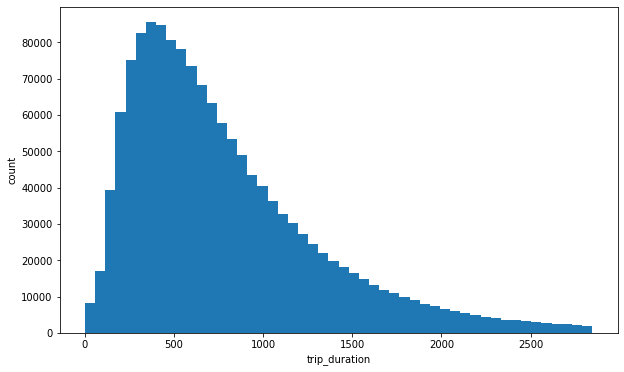

In [27]:
show_hist('trip_duration')

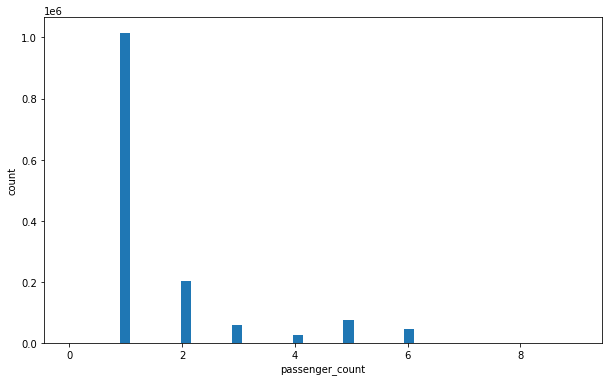

In [28]:
show_hist('passenger_count')

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

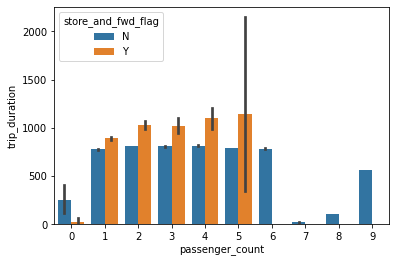

In [32]:
sns.barplot(x='passenger_count', y='trip_duration', hue='store_and_fwd_flag', data = train_df)

In [35]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [36]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [37]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,haversine_distance,manhattan_distance,direction
1309581,id3056203,1,2016-01-04 09:53:03,2016-01-04 10:20:24,1,-73.874557,40.774071,-73.987091,40.738731,N,1641,2016-01-04,4,9,1,0,10.260880,13.405657,-112.480716
594851,id1890491,2,2016-06-03 08:44:37,2016-06-03 08:56:45,1,-73.962784,40.767033,-73.970757,40.751865,N,728,2016-06-03,3,8,6,4,1.815287,2.357949,-158.286908
1327294,id2665439,2,2016-05-13 19:36:18,2016-05-13 19:58:44,1,-73.975304,40.762505,-74.003479,40.738132,N,1346,2016-05-13,13,19,5,4,3.602423,5.083026,-138.779628
1062954,id3967823,1,2016-01-12 23:46:03,2016-01-13 00:27:07,1,-73.987160,40.720490,-73.977081,40.614498,N,2464,2016-01-12,12,23,1,1,11.816316,12.635059,175.871452
281515,id0788323,1,2016-03-25 20:51:30,2016-03-25 20:59:33,2,-73.976547,40.747719,-73.958824,40.768326,N,483,2016-03-25,25,20,3,4,2.734746,3.784391,33.077113
254797,id0605229,2,2016-02-11 08:32:37,2016-02-11 08:36:07,1,-73.947784,40.775005,-73.955505,40.779510,N,210,2016-02-11,11,8,2,3,0.820741,1.151098,-52.381635
790668,id3586540,2,2016-06-21 07:29:46,2016-06-21 07:40:03,5,-73.945862,40.773540,-73.972130,40.762569,N,617,2016-06-21,21,7,6,1,2.526226,3.431892,-118.866731
427103,id2486148,1,2016-06-07 21:20:29,2016-06-07 21:31:33,2,-73.982224,40.768848,-73.955139,40.765530,N,664,2016-06-07,7,21,6,1,2.310585,2.649900,99.181439
1169276,id3227651,1,2016-02-24 16:37:20,2016-02-24 17:16:03,1,-73.885422,40.773064,-73.963257,40.765186,N,2323,2016-02-24,24,16,2,2,6.613004,7.430270,-97.586030
405164,id3538374,1,2016-02-29 08:04:53,2016-02-29 08:13:04,1,-73.997795,40.756115,-73.979836,40.757088,N,491,2016-02-29,29,8,2,0,1.516581,1.620895,85.904253


In [42]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction' ]
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])